In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

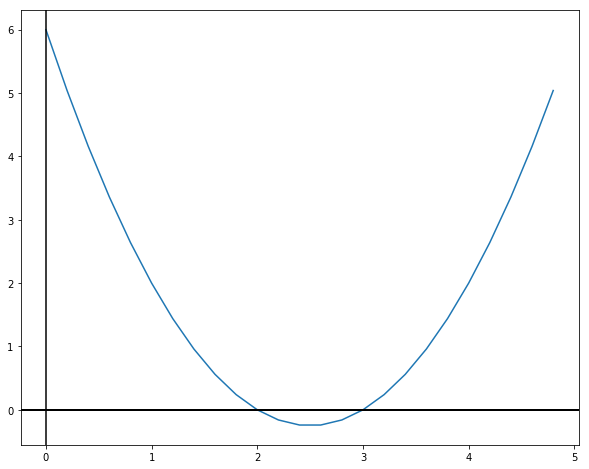

In [2]:
'''
f(x) = a polynomial function
f(x) = x^2 - 5x + 6
'''

def f_test(x):
    f = x**2 - 5*x + 6
    return f

'''
Computes derivative df/dx for function f(x)
'''
def dfdx_test(f, x, h=1e-10):
    df = 2*x - 5
    return df


'''
Plot for test function
'''
def plot_f(f, start_x, end_x, steps=0.2):
    x_vals = np.arange(start_x, end_x, steps)
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals)
    plt.axhline(y=0, xmin=x_vals[0], xmax=x_vals[-1], linewidth=2, color = 'k')
    plt.axvline(x=0, color = 'k')
    plt.show()
    
plot_f(f_test, 0, 5)

In [3]:
'''
To find the root of f(x), we need to find xroot, such that f(xroot) = 0.
Therefore, we can continue searching until for given x0, we arrive at f(xroot) - f(x0) < epsilon
'''
def delta(f, x):
    return abs(0-f(x))


'''
For unknown function, compute derivative of f using first principle
'''
def dfdx_first_principle(f, x, h=1e-10): 
    fplus = f(x+h)
    fminus = f(x-h)
    return ((fplus-fminus)/(2*h))

'''
Newton's method to find out root
'''
def newtons_method(x0, f, df=dfdx_first_principle, epsilon = 1e-7, max_steps = 10000, verbose=False):
    delta_val = delta(f, x0)
    root = x0
    num_steps = 0
    while delta_val > epsilon and num_steps < max_steps:
        slope = df(f, root, epsilon)
        # if slope is tending to 0, then add a cache value (here epsilon/10) to avoid divide by 0
        if (abs(slope) < epsilon):
            slope += epsilon/10
        root = root - f(root)/slope
        delta_val = delta(f, root)
        num_steps += 1

    if (verbose == True):
        print ("Number of steps taken to identify root: ", num_steps)
    if num_steps == max_steps:
        return None
    return root

'''
Verify Newton's method for the function f defined above 
with starting value of x0 = 1
'''
nm = newtons_method(0, f_test, df=dfdx_test, epsilon = 1e-7, verbose=True)
print (nm)


Number of steps taken to identify root:  6
1.9999999999946272


In [4]:
'''
Verify Newton's method for above test quadratic and test derivative function
with initial guesses as 0 and 5.
'''

vals = np.array([0,5])
roots = []

for v in vals:
    root = newtons_method(v, f_test, dfdx_test, epsilon = 1e-10, verbose=True)
    roots.append(root)

print ("Roots identified: ", roots)

Number of steps taken to identify root:  6
Number of steps taken to identify root:  6
Roots identified:  [1.9999999999946272, 3.0000000000053726]


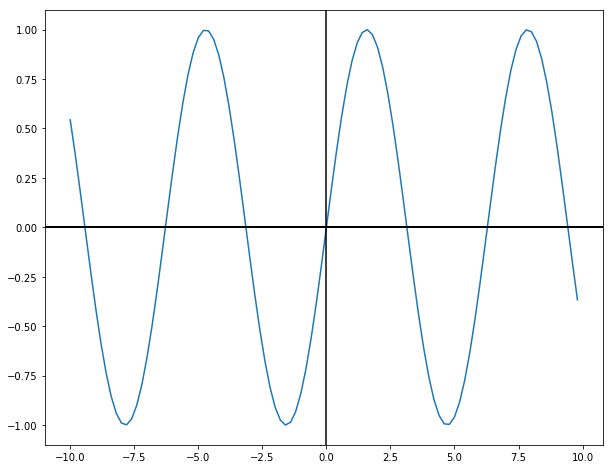

Number of steps taken to identify root:  2
Root:  6.63445785158e-09


In [5]:
def sine(x):
    return np.sin(x)


plot_f(sine, -10, 10)
'''
Verify Newton's method for sine function
'''

root = newtons_method(0.2, sine, epsilon = 1e-7, verbose=True)
print ("Root: ", root)



Function sin(x) has multiple roots and the closer ones to starting x = 0.2 are [-2$\pi $, -$\pi $, 0, $\pi $, 2$\pi $]. The convergence occurs at the closest solution.

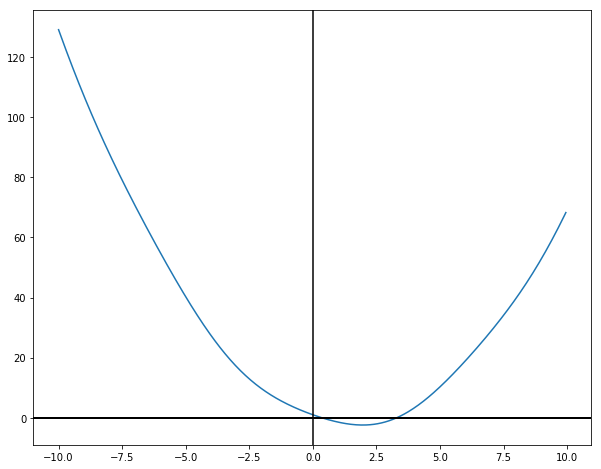

Number of steps taken to identify root:  3
Root:  0.35449636741


In [6]:
'''
Trying another function, a mix of polynomial and trignometric
'''

def f2(x):
    return (x**2 - 3*x + np.cos(x))

plot_f(f2, -10, 10, steps=0.05)

root = newtons_method(0.2, f2, epsilon = 1e-10, verbose=True)
print ("Root: ", root)


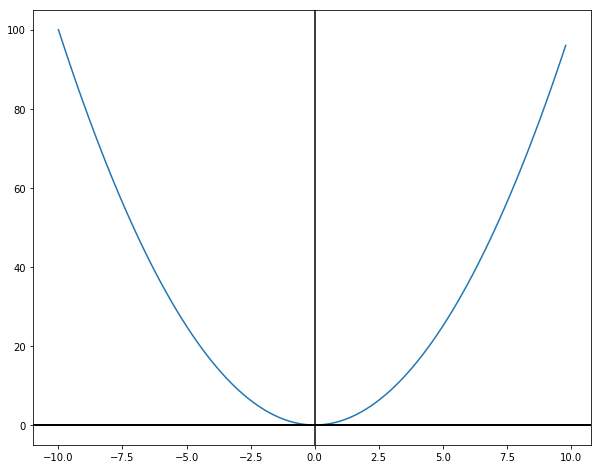

Number of steps taken to identify root:  17
Root:  -7.62939533059462e-06


In [7]:
'''
Test for a function whose derivative's root and fucntion's root exist at the same point

For example, for f(x) = x**2, 
f(x) = 0 at x = 0
df(x) = 2x = 0 at x = 0
'''

def f3(x):
    return x**2

plot_f(f3, -10, 10)

root = newtons_method(-1, f3, epsilon = 1e-10, verbose=True)
print ("Root: ", root)

The root converged at a point very close to 0.

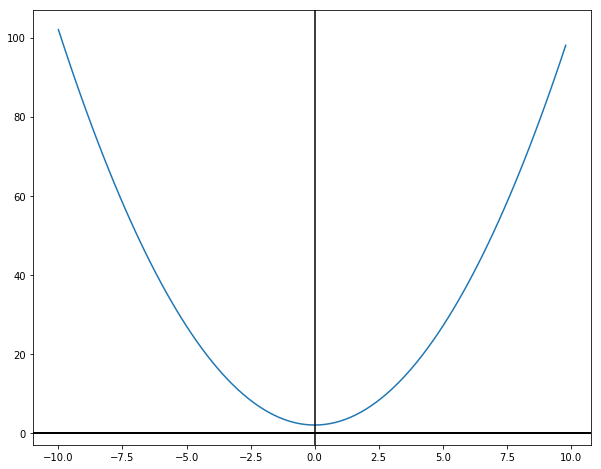

Number of steps taken to identify root:  10000
Root:  None


In [8]:
'''
Now let's try for a function whose roots do not exist,
for example, f(x) = x**2 + 2
'''

def f4(x):
    return x**2 + 2

plot_f(f4, -10, 10)

root = newtons_method(-1, f4, epsilon = 1e-10, verbose=True)
print ("Root: ", root)